<a href="https://colab.research.google.com/github/joshimohitm9/ML_quick_revison/blob/main/machine_learning_complete_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Missing Values**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/drive/MyDrive/loan_data_set.csv")

In [4]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
271,LP001891,Male,Yes,0,Graduate,No,11146,0.0,136.0,360.0,1.0,Urban,Y
61,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
184,LP001639,Female,Yes,0,Graduate,No,3625,0.0,108.0,360.0,1.0,Semiurban,Y
124,LP001439,Male,Yes,0,Not Graduate,No,4300,2014.0,194.0,360.0,1.0,Rural,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
null_per=df.isnull().sum()/df.shape[0]*100
null_per

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: >

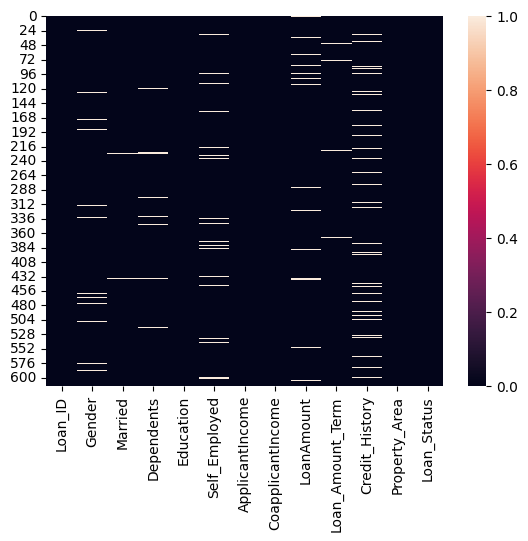

In [8]:
sns.heatmap(df.isnull())

**Drop Columns**

In [9]:
drop_col=null_per[null_per>6]

In [10]:
df.drop(columns=drop_col.index,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(523, 12)

<Axes: >

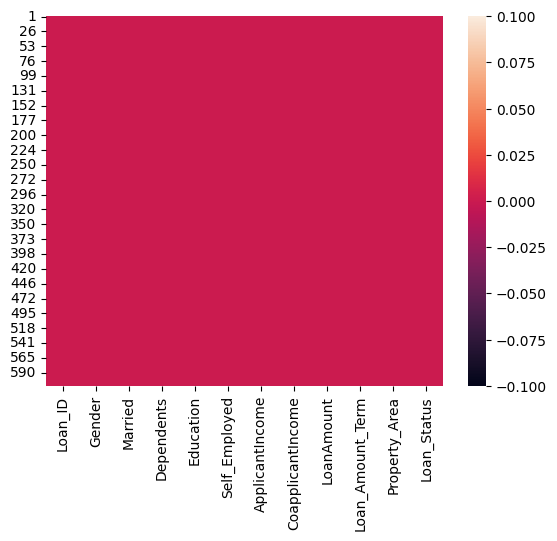

In [13]:
sns.heatmap(df.isnull())

**Impute Categorical Data**

In [14]:
df=pd.read_csv("/content/drive/MyDrive/loan_data_set.csv")

In [15]:
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
108,LP001379,Male,Yes,2,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban,N
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
548,LP002776,Female,No,0,Graduate,No,5000,0.0,103.0,360.0,0.0,Semiurban,N


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

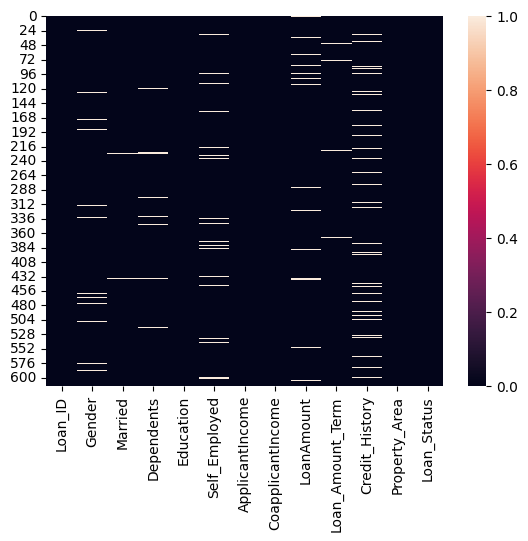

In [17]:
sns.heatmap(df.isnull())

In [18]:
for i in df.select_dtypes("object").columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df["Credit_History"].mean()

0.8421985815602837

In [21]:
 for  i in df.select_dtypes("float").columns:
     df[i].fillna(df[i].mean(),inplace=True)

<Axes: >

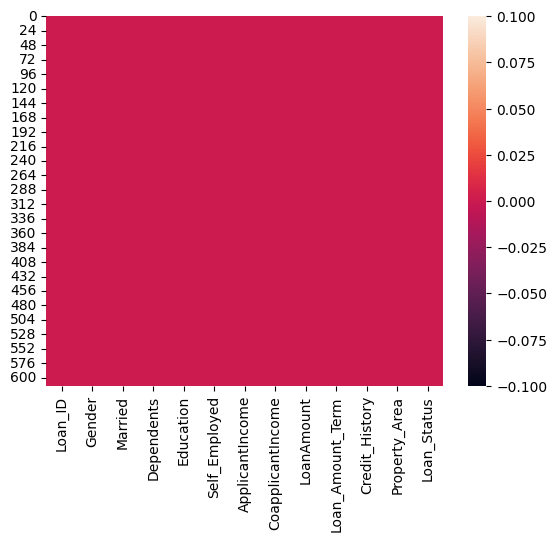

In [22]:
sns.heatmap(df.isnull())

**Filling missing values using sklearn**

In [23]:
df=pd.read_csv("/content/drive/MyDrive/loan_data_set.csv")

In [24]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
198,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y
212,LP001713,Male,Yes,1,Graduate,Yes,7787,0.0,240.0,360.0,1.0,Urban,Y
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
472,LP002519,Male,Yes,3+,Graduate,No,4691,0.0,100.0,360.0,1.0,Semiurban,Y


In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
miss_cat_val=df.select_dtypes("object").columns

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
si=SimpleImputer(strategy="most_frequent")

In [29]:
si.fit_transform(df[miss_cat_val])

array([['LP001002', 'Male', 'No', ..., 'No', 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 'No', 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 'No', 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 'No', 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 'Yes', 'Semiurban', 'N']],
      dtype=object)

In [30]:
df1=pd.DataFrame(si.fit_transform(df[miss_cat_val]),columns=miss_cat_val)

In [31]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [32]:
df.drop(columns=miss_cat_val,inplace=True)

In [33]:
df1.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [34]:
miss_flt_var=df.select_dtypes("float").columns

In [35]:
sl1=SimpleImputer(strategy="mean")

In [36]:
sl1.fit_transform(df[miss_flt_var])

array([[0.00000000e+00, 1.46412162e+02, 3.60000000e+02, 1.00000000e+00],
       [1.50800000e+03, 1.28000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 6.60000000e+01, 3.60000000e+02, 1.00000000e+00],
       ...,
       [2.40000000e+02, 2.53000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 1.87000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 1.33000000e+02, 3.60000000e+02, 0.00000000e+00]])

In [37]:
df2=pd.DataFrame(sl1.fit_transform(df[miss_flt_var]),columns= miss_flt_var)

In [38]:
df2

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
...,...,...,...,...
609,0.0,71.000000,360.0,1.0
610,0.0,40.000000,180.0,1.0
611,240.0,253.000000,360.0,1.0
612,0.0,187.000000,360.0,1.0


In [39]:
df.drop(columns=miss_flt_var,inplace=True)

In [40]:
df

,ApplicantIncome
0,5849
1,4583
2,3000
3,2583
4,6000
...,...
609,2900
610,4106
611,8072
612,7583


In [41]:
df=pd.concat([df,df1,df2],axis=1)

In [42]:
df

,ApplicantIncome,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,LP001002,Male,No,0,Graduate,No,Urban,Y,0.0,146.412162,360.0,1.0
1,4583,LP001003,Male,Yes,1,Graduate,No,Rural,N,1508.0,128.000000,360.0,1.0
2,3000,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,0.0,66.000000,360.0,1.0
3,2583,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2358.0,120.000000,360.0,1.0
4,6000,LP001008,Male,No,0,Graduate,No,Urban,Y,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,LP002978,Female,No,0,Graduate,No,Rural,Y,0.0,71.000000,360.0,1.0
610,4106,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,0.0,40.000000,180.0,1.0
611,8072,LP002983,Male,Yes,1,Graduate,No,Urban,Y,240.0,253.000000,360.0,1.0
612,7583,LP002984,Male,Yes,2,Graduate,No,Urban,Y,0.0,187.000000,360.0,1.0


In [43]:
df.isnull().sum()

ApplicantIncome      0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

**One Hot Encoding**

In [44]:
pd.get_dummies(df["Gender"])

,Female,Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
609,True,False
610,False,True
611,False,True
612,False,True


In [45]:
df.select_dtypes("object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
OHE=OneHotEncoder(drop="first")
ar=OHE.fit_transform(df[['Gender', 'Married','Education',"Self_Employed","Loan_Status"]]).toarray()

In [48]:
ar

array([[1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1.],
       ...,
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [49]:
ar=pd.DataFrame(ar,columns=["Gender_Male","Married_Yes","Not_Graduate_education","Self_emp_yes","loan_stesus_yes"])

In [50]:
df.drop(columns=['Gender', 'Married',"Education","Self_Employed","Loan_Status"],inplace=True)

In [51]:
df=pd.concat([df,ar],axis=True)
df.head()

,ApplicantIncome,Loan_ID,Dependents,Property_Area,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Not_Graduate_education,Self_emp_yes,loan_stesus_yes
0,5849,LP001002,0,Urban,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4583,LP001003,1,Rural,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3000,LP001005,0,Urban,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,1.0,1.0
3,2583,LP001006,0,Urban,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,1.0
4,6000,LP001008,0,Urban,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,1.0


In [52]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
a=LE.fit_transform(df["Property_Area"])

# 0 -----> Rural
# 1 ----> Urban
# 2-----> Semiurban

In [54]:
df["Property_Area"]=pd.DataFrame(a)

In [55]:
df

,ApplicantIncome,Loan_ID,Dependents,Property_Area,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Not_Graduate_education,Self_emp_yes,loan_stesus_yes
0,5849,LP001002,0,2,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4583,LP001003,1,0,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3000,LP001005,0,2,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,1.0,1.0
3,2583,LP001006,0,2,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,1.0
4,6000,LP001008,0,2,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,LP002978,0,0,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,1.0
610,4106,LP002979,3+,0,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,1.0
611,8072,LP002983,1,2,240.0,253.000000,360.0,1.0,1.0,1.0,0.0,0.0,1.0
612,7583,LP002984,2,2,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,0.0,1.0


**Ordinal Encoding**

In [56]:
dataset={
    "s.no":[1,2,3,4,5],
    "name":["Mohit","Rohit","Shubham","Twinkle","Chiku"],
    "Size":["XL","L","M","L","S"]
}

In [57]:
dataset=pd.DataFrame(dataset)
dataset

,s.no,name,Size
0,1,Mohit,XL
1,2,Rohit,L
2,3,Shubham,M
3,4,Twinkle,L
4,5,Chiku,S


In [58]:
dataset.Size.unique()

array(['XL', 'L', 'M', 'S'], dtype=object)

In [59]:
from  sklearn.preprocessing import OrdinalEncoder

OE=OrdinalEncoder(categories=[['S',"M","L","XL"]])
dataset["Size_encoded"]=OE.fit_transform(dataset[["Size"]])


In [60]:
dataset

,s.no,name,Size,Size_encoded
0,1,Mohit,XL,3.0
1,2,Rohit,L,2.0
2,3,Shubham,M,1.0
3,4,Twinkle,L,2.0
4,5,Chiku,S,0.0


**Outlier detection and handling**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
df=pd.read_csv("/content/drive/MyDrive/loan_data_set.csv")

In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: ylabel='CoapplicantIncome'>

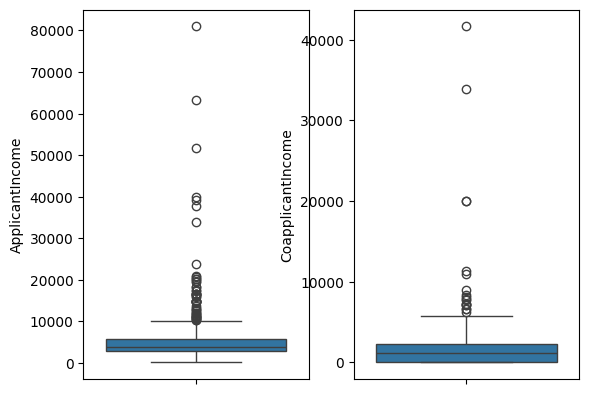

In [65]:
plt.subplot(1,2,1)
sns.boxplot(df["ApplicantIncome"])
plt.subplot(1,2,2)
sns.boxplot(df["CoapplicantIncome"])

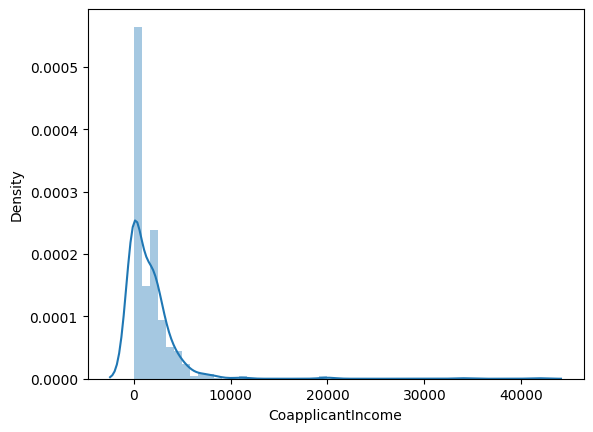

In [66]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

**IQR**
INTER QUNATILE RANGE
  

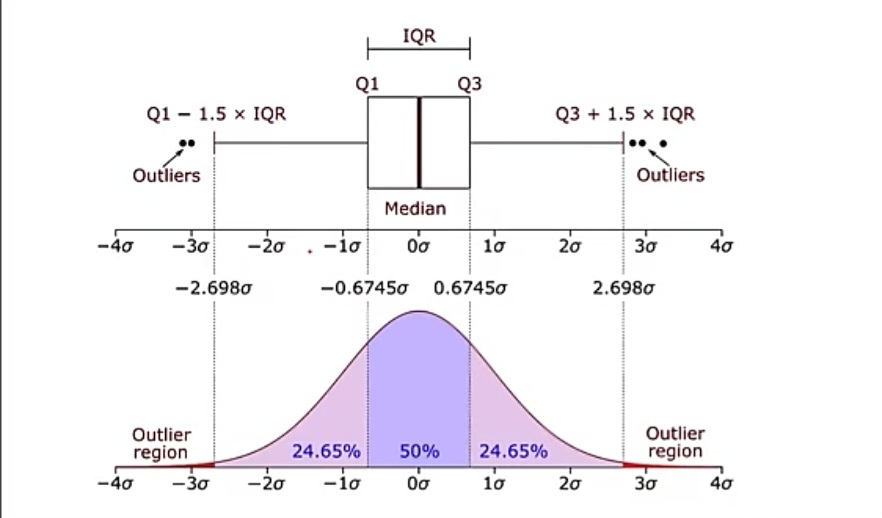



In [67]:
q1= df["CoapplicantIncome"].quantile(0.25)
# q2= df["CoapplicantIncome"].quantile(0.5)
q3= df["CoapplicantIncome"].quantile(0.75)
q1,q3

(0.0, 2297.25)

In [68]:
IQR=q3-q1
IQR

2297.25

In [69]:
min_IQR= q1-1.5*IQR
max_IQR=q3+1.5*IQR

In [70]:
min_IQR,max_IQR

(-3445.875, 5743.125)

In [71]:
new_df=df[df["CoapplicantIncome"]<=max_IQR]

In [72]:
new_df.shape

(596, 13)

<Axes: ylabel='CoapplicantIncome'>

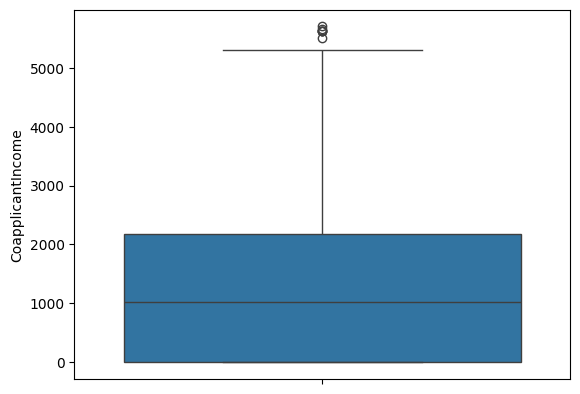

In [73]:
sns.boxplot(new_df["CoapplicantIncome"])

**Removing outlier using Z score**

In [74]:
df=pd.read_csv("/content/drive/MyDrive/loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


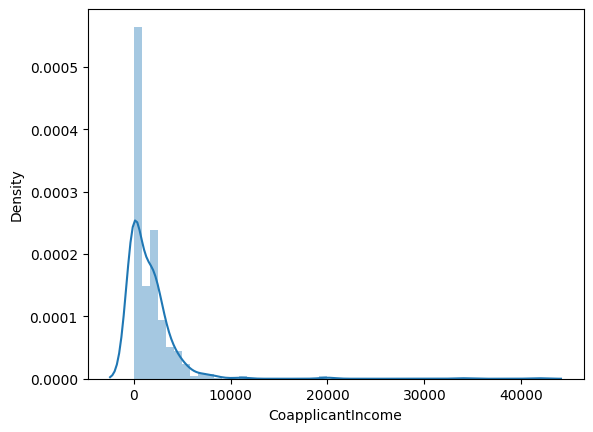

In [76]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

In [77]:
df.shape

(614, 13)

In [78]:
mean=df["CoapplicantIncome"].mean()
std=df["CoapplicantIncome"].std()

In [79]:
min_val= mean - 3 * std
max_val= mean + 3 * std

In [80]:
min_val,max_val

(-7157.4993096454655, 10399.990905699668)

In [81]:
df_new=df[df["CoapplicantIncome"]<= max_val]

In [82]:
df.shape

(614, 13)

In [83]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

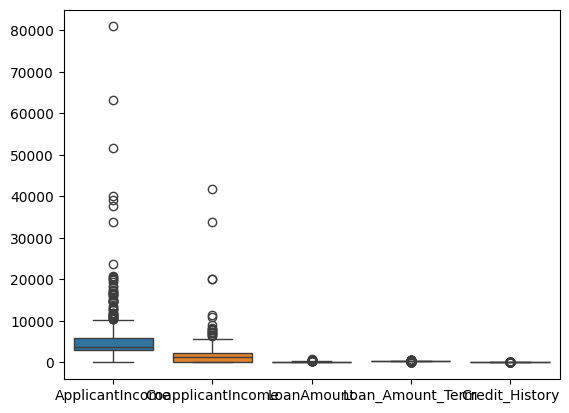

In [84]:
sns.boxplot(df)

In [85]:
df["ApplicantIncome"].isnull().sum()

0

In [86]:
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

ss=StandardScaler()
a=ss.fit_transform(df[["ApplicantIncome"]])
ApplicantIncome_new=pd.DataFrame(a,columns=["ApplicantIncome_new"])

df=pd.concat([df,ApplicantIncome_new],axis=1)

In [87]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064


Text(0.5, 1.0, 'After')

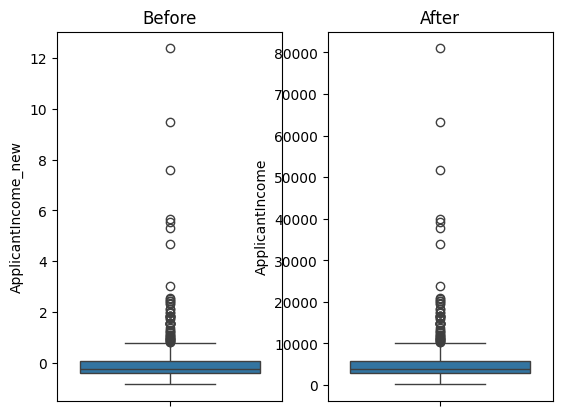

In [88]:
plt.subplot(1,2,1)
sns.boxplot(df["ApplicantIncome_new"])
plt.title("Before")
plt.subplot(1,2,2)
sns.boxplot(df["ApplicantIncome"])
plt.title("After")

Text(0.5, 1.0, 'After')

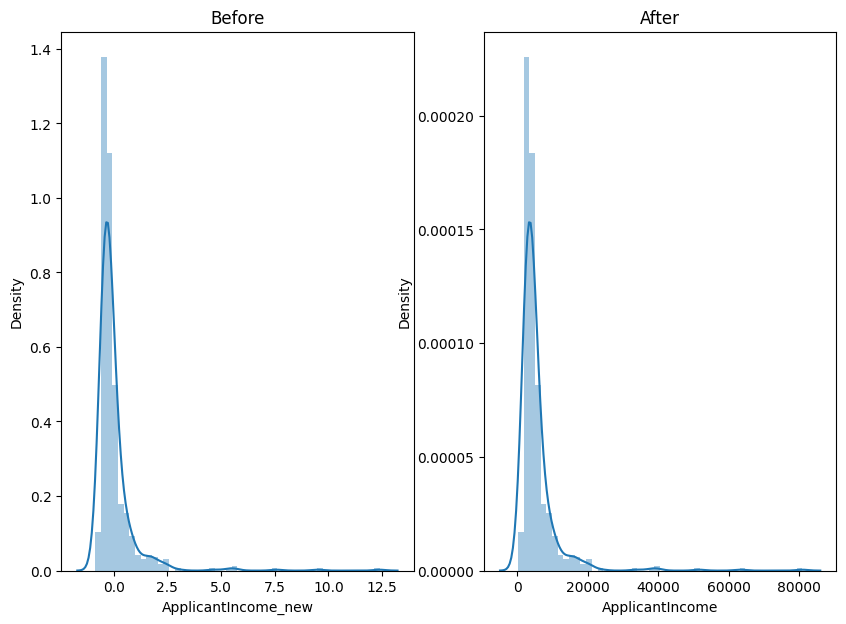

In [89]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(df["ApplicantIncome_new"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(df["ApplicantIncome"])
plt.title("After")

**`MIN MAX SCALER -----FOR NORMOLIZATION `**

In [90]:
df["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [91]:
mm=MinMaxScaler()
a=mm.fit_transform(df[["CoapplicantIncome"]])

CoapplicantIncome_new=pd.DataFrame(a,columns=["CoapplicantIncome_new"])

In [92]:
df=pd.concat([df,CoapplicantIncome_new],axis=1)

In [93]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_new,CoapplicantIncome_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064,0.000000


Text(0.5, 1.0, 'After')

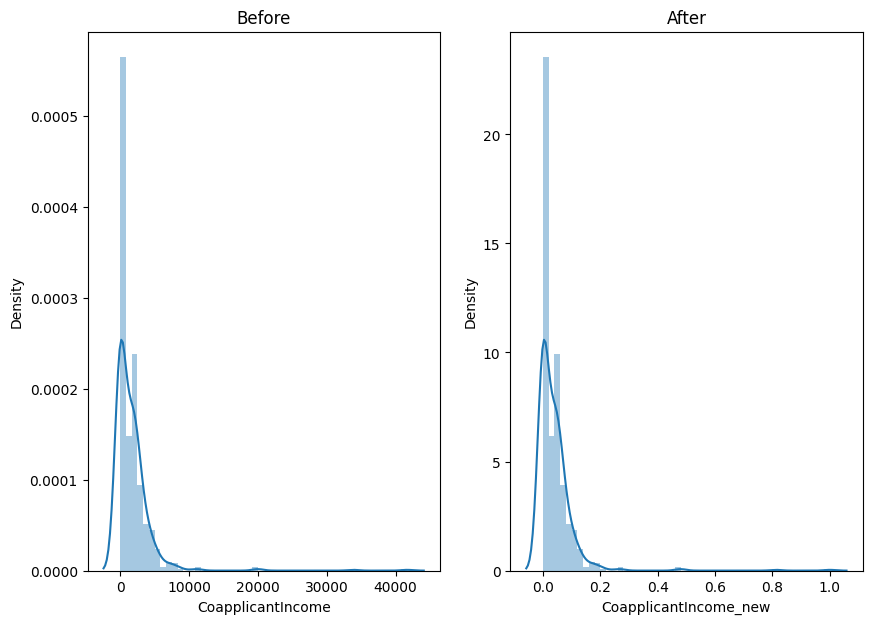

In [94]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
sns.distplot(df["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(df["CoapplicantIncome_new"])
plt.title("After")

In [95]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [96]:
df.drop_duplicates(inplace= True)

In [97]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_new,CoapplicantIncome_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000


**Changing Dtype**

In [98]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 601 non-null    object 
 2   Married                611 non-null    object 
 3   Dependents             599 non-null    object 
 4   Education              614 non-null    object 
 5   Self_Employed          582 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             592 non-null    float64
 9   Loan_Amount_Term       600 non-null    float64
 10  Credit_History         564 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  ApplicantIncome_new    614 non-null    float64
 14  CoapplicantIncome_new  614 non-null    float64
dtypes: flo

In [100]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [101]:
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

In [102]:
df["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [103]:
df["Dependents"].replace("3+","3",inplace=True)
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [104]:
df["Dependents"]=df["Dependents"].astype("int")

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 601 non-null    object 
 2   Married                611 non-null    object 
 3   Dependents             614 non-null    int64  
 4   Education              614 non-null    object 
 5   Self_Employed          582 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             592 non-null    float64
 9   Loan_Amount_Term       600 non-null    float64
 10  Credit_History         564 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  ApplicantIncome_new    614 non-null    float64
 14  CoapplicantIncome_new  614 non-null    float64
dtypes: flo

**Function transformer**

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

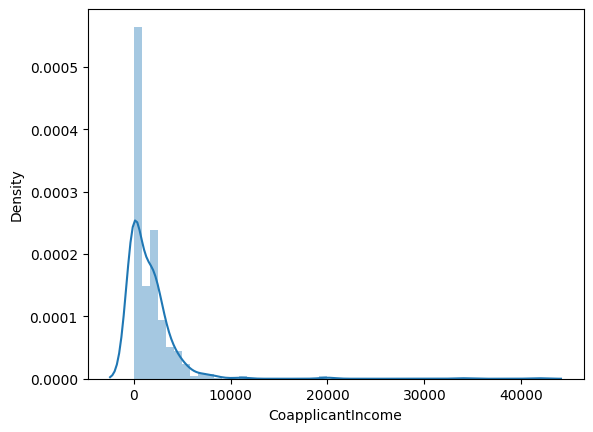

In [106]:
sns.distplot(df['CoapplicantIncome'])

In [107]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df["CoapplicantIncome"].quantile(0.75)

In [108]:
IQR=q3-q1

In [109]:
min_= q1 - 3 * IQR
max_= q3 + 3 * IQR

In [110]:
min_,max_

(-6891.75, 9189.0)

In [111]:
df_new=df[(df["CoapplicantIncome"]<= max_) & (df["CoapplicantIncome"]>=min_)]

In [112]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_new,CoapplicantIncome_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130,0.000000
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064,0.000000


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

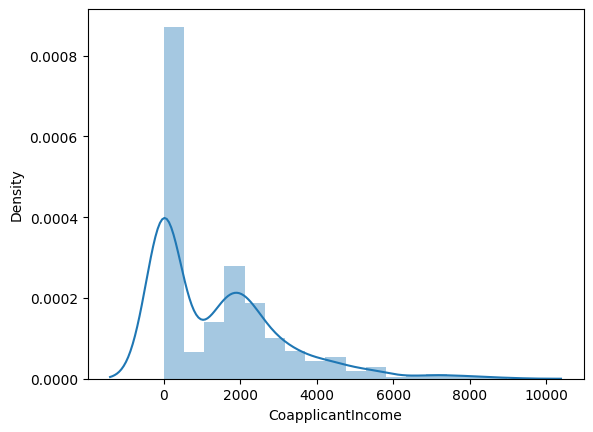

In [113]:
sns.distplot(df_new["CoapplicantIncome"])